#  My first time

This is my first time using [Jupyter](https://jupyter.org/) and coding in [Python](https://www.python.org/).  Jupyter notebook appears to be a possible alternative to RStudio and allows one to also code in R and other languages.  We can use type text as Markdown and also use Latex.

**Please continue to do your homework and ICAs and projects in R and Rstudio as we have throughout the term.  Do not submit work in Python or with Jupyter.**

#  Euler's method

Recall that in the movie [Hidden Figures](https://www.youtube.com/watch?v=v-pbGAts_Fg), the *ancient* method is used to solve an important problem at NASA.

We are concerned with giving a numerical solution the initial-value problem (IVP) given by
\begin{equation*}
y' = f(t,y)  \text{ and }  y(t_0) = y_0.
\end{equation*}

Suppose we are looking for a  solution $y$ to the IVP.  We know that $y(t_0) = y_0$, but we can also approximate using tangent lines for $t_1$ near $t_0$ so that
$$ y(t_1)  \approx y_1:=   y(t_0) + y'(t_0) (t_1 - t_0)  =  y_0 +  f(t_0, y_0) (t_1-t_0).$$
Now, if we want another $t_2$ near $t_1$, we can repeat the same reasoning to obtain
$$y(t_2) \approx  y_2 :=  y_1+  f(t_1, y_1) (t_2-t_1);$$
in general for the times $t_0 < t_1 < t_2 < \cdots < t_n < \cdots t_N$, we obtain the iteration:
$$ y_{n+1} = y_n + f(t_n, y_n)(t_{n+1} - t_n).$$
Typically, one might choose a uniform mesh size, $h = y_{i+1} - y_i$, where $h$ is small.    Consider the function $\phi$ given by interpolating the points $y_0, y_1, \ldots, y_n$ linearly.   The claim is the function $\phi$ approximates a solution to the  initial value problem, under some regularity condition, and as the mesh size $h$ decreases the function $\phi$ will converge to a solution of the initial value problem.    The issue here is that each time we make an approximation $y_n$ it is based on $y_{n-1}$ which is itself an approximation, one needs to make sure these errors do not add up too fast, and get out of hand.

We will now introduce enough basic Python to code Euler's method, to solve the initial value problem $y' = y$ with $y(0) = 1$ on the interval $[0,1]$ and as a result approximate the value of $e$.  

Our code will illustrate some mathematical operations in Python using the *numpy* package, and also the use of a *while* loop.
  



In [12]:
import numpy as np       #you may need to install this package

y = np.array([1,2,3])     # to make vectors
x = np.array([4,5,6])
print(x+y)                
z=np.concatenate((x,y))   # like the combine function in R
print(z)
print(len(z))             # length of a vector
print(y[0])                # indexing starts at zero
print(y[2])
print(x[-1])               # last element of the vector

t=np.linspace(0,1,num=10)
print(t)

[5 7 9]
[4 5 6 1 2 3]
6
1
3
6
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [43]:
y=np.array([1])
while  len(y) < 2000:
    y = np.concatenate( (y, np.array(   [y[-1] + y[-1]*(0.001)])  )  )

print(y[1000])


2.716923932235896


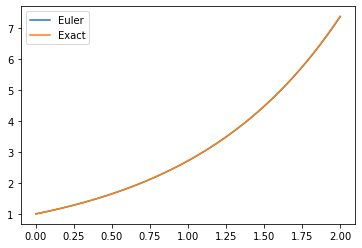

In [46]:

import matplotlib.pyplot as plt  # In order to plot functions
t=np.linspace(0,2,num=2000)
plt.plot(t,y, label='Euler')
plt.plot(t,np.exp(t), label='Exact')
plt.legend(loc='upper left')
plt.show()



# Probability and statistics in Python

In theory, we should be able to write equivalent code that we produced to illustrate various stochastic systems.    Here, we will start with  an illustration of the concept of a confidence interval.  


In [66]:
import random

u=random.random()  # calls a uniform [0,1]
v=random.gauss(0, 1)  # calls a standard normal

print(u)
print(v)
u = [random.random() for _ in range(10)]  # calls 10 uniforms
print(u)
v = [ random.gauss(0, 1) for _ in range(10)] # calls 10 standard normals
print(v)

v = np.random.standard_t(4)   # calls t-distribution with 4 degrees of freedom
print(v)

0.19768217651259534
-1.9517789513707928
[0.9183395020144753, 0.4988994663679698, 0.8888760452852505, 0.1297218183809703, 0.48296625368357216, 0.49372536885857865, 0.8872642446627372, 0.24422556953717245, 0.27335359472209897, 0.23490544209051867]
[-1.338058384596201, -0.1020209562937567, -1.6521257717272606, -0.8914962216577567, -0.6080566755569897, 1.7738299694945714, -0.11026085185984179, 0.19614841628371482, 1.3072723200316096, -0.4804580512355239]
-0.5901707727220016


The following code will illustrate the concept of what exactly does $90$ percent refer to in a $t$-distribution based confidence interval.  We consider the case, where we have a sample of five independent normal random variables, where *both* the mean and variance are unknown. With the standard notation, we have  $\alpha=0.1$, $n=5$, and $n-1=4$;  the
critical value is given by  $t(0.05,4)=2.132$.  Given a random sample $x= (x_1, \ldots, x_5)$,  we know that the confidence interval is given by

$$ \bar{x} \pm 2.132 \cdot \frac{s(x)}{ \sqrt{5}}.$$

The true mean either lies in this interval or not;  once we are given $x$, in the classical sense,  there is no probability involved.  However, if we repeat this experiment many times, roughly $90$ percent of those confidence intervals will contain the true mean.   We will illustrate this by sampling from standard normals, repeatedly, so that $0$ will be contained in $90$ percent of the confidence intervals.  

The code will illustrate the use a *function* and a *for loop*.  


In [87]:
import statistics as s

def CI(x):
    l= s.mean(x) - 2.132 * ( s.stdev(x)/math.sqrt(5) )
    u= s.mean(x) + 2.132 * ( s.stdev(x)/math.sqrt(5) )
    n=0
    if l <0 & 0 < u: 
        n=1
    return n;

def experiment(n):
    num=0
    for i in range(n):
        v = [ random.gauss(0, 1) for _ in range(5)]
        num = num + CI(v)
    return num/n    

print(experiment(1000))



0.895


# Other resources

*  [Patrick Walls](https://www.math.ubc.ca/~pwalls/math-python/) site at UBC.



*  [ipynb Source for this file](https://tsoo-math.github.io/ucl/first.ipynb)




In [92]:
    from datetime import datetime
    print(datetime.now())

2020-12-09 15:31:46.855253
